# Students Performance

### Libraries

In [573]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython as dp
import scipy as scipy
import statsmodels as stats_models

### Functions

In [574]:
def new_scores(me,st,size,sd): # Generating random scores for new subjects
    rng = np.random.default_rng(sd)
    return rng.normal(loc=me, scale=st, size=size)

def replace_data(data_rep,val_to_rep, val_rep):
    data_rep.replace(to_replace=val_to_rep, value=val_rep, inplace=True)

def descriptive_stats(data_original):
    # descriptive statistics from the original data
    data_desc_o = data_original.describe().round(3)
    data_desc_o.drop(['count'],inplace=True)
    data_desc_o.reset_index(inplace=True)
    data_desc_o.rename(columns={'index': 'Stat'}, inplace=True)
    
    # creating an dataframe for new descriptive statistics

    data_desc_n = pd.DataFrame(columns=['mode','var','amp','sem','cv','skew','kurt'], index=['Math_score', 'Reading_score', 'Writing_score', 'Science_score', 'Social_studies_score', 'Foreign_language_score', 'Physical_education_score', 'Final_score'])
    

    data_desc_n['mode'] = data_original.mode(axis=0,numeric_only=True).dropna().T
    data_desc_n['var'] = data_original.var(axis=0, numeric_only=True).round(3).T
    data_desc_n['amp'] = data_desc_o.set_index('Stat', inplace=False).loc['max'] - data_desc_o.set_index('Stat',inplace=False).loc['min']
    data_desc_n['sem'] = data_original.sem(axis=0, numeric_only=True).round(3).T
    data_desc_n['cv'] = (data_desc_o.set_index('Stat',inplace=False).loc['std']/data_desc_o.set_index('Stat', inplace=False).loc['mean']).round(3)
    data_desc_n['skew'] = data_original.skew(axis=0, numeric_only=True).round(3).T
    data_desc_n['kurt'] = data_original.kurt(axis=0,numeric_only=True).round(3).T
    data_desc_n = data_desc_n.T
    data_desc_n.reset_index(inplace=True)
    data_desc_n.rename(columns={'index': 'Stat'}, inplace=True)
    return pd.concat([data_desc_o,data_desc_n], axis=0, join='outer', ignore_index=True)

def show_text_markdown(string): #  Standard method to show text
    return dp.display.Markdown(string)

def ztest_two_samples(samp1, samp2, alp, val, alter,h_null, h_alter): # return 0 if the null hypothesis is accepted, otherwise return 1.
    z_value, p_val = stats_models.stats.weightstats.ztest(x1=samp1,x2=samp2,value=val,alternative=alter)
    return f'Null hypothesis is accepted: {h_null}' if p_val > alp else f'Null hypothesis is not accepted: {h_alter}'

def anova_race(data,h_null, h_alter,alp):
    f_stat, p_val = scipy.stats.f_oneway(data[data['race/ethnicity'].isin(['group A'])]['Final_score'],data[data['race/ethnicity'].isin(['group B'])]['Final_score'],data[data['race/ethnicity'].isin(['group C'])]['Final_score'], data[data['race/ethnicity'].isin(['group D'])]['Final_score'], data[data['race/ethnicity'].isin(['group E'])]['Final_score'])
    return f'Null hypothesis is accepted: {h_null}' if p_val > alp else f'Null hypothesis is not accepted: {h_alter}'

### Libraries version

In [575]:
show_text_markdown(f"Pandas package version: {pd.__version__} \n Seaborn package version: {sns.__version__} \n Matplotlib package version: {matplotlib.__version__} \n Numpy package version: {np.__version__} \n IPython package version: {dp.__version__} \n SciPy package version: {scipy.__version__} \n Statsmodels package version: {stats_models.__version__}")

Pandas package version: 2.2.0 
 Seaborn package version: 0.13.2 
 Matplotlib package version: 3.8.2 
 Numpy package version: 1.26.3 
 IPython package version: 8.20.0 
 SciPy package version: 1.11.4 
 Statsmodels package version: 0.14.1

### Data

In [576]:
# Importing data

studentsperformance = pd.read_csv("StudentsPerformance.csv")
studentsperformance.rename(columns={'math score': 'Math_score', 'reading score': 'Reading_score', 'writing score': 'Writing_score'}, inplace=True)

# Change from none to no one
replace_data(studentsperformance, ['none','completed'], ['No one','Completed'])


In [577]:
# Calling the function new_scores to generate scores for new subjects and for those original ones I'm generating normal distributions

means = [55.3,80.9,69.4,65.471, 57.164, 75.317, 42.610]
stds = [15.163,14.601,12.196,13.390, 11.943, 13.206, 14.125]
size_sample = 1000
seed = [1000, 451, 28,42, 75, 139, 7]
subjects = ['Math_score','Reading_score','Writing_score','Science_score', 'Social_studies_score', 'Foreign_language_score', 'Physical_education_score']

for element in range(len(subjects)):
    studentsperformance[subjects[element]] = new_scores(means[element], stds[element], size_sample, seed[element])

# Final Average

studentsperformance['Final_score'] = studentsperformance.mean(axis=1, numeric_only=True).round(2)

- ##### How many students do we have?

In [578]:
show_text_markdown(f'We have data for {len(studentsperformance)} students.')

We have data for 1000 students.

### Categorical variables

#### Genders

In [579]:
# Identifying the genders and split the students among them
gender = studentsperformance.gender.value_counts().to_frame()
gender.reset_index(inplace=True)
gender.columns = ["Gender", "Quantity"]
gender['Porcent'] = gender.Quantity/gender.Quantity.sum()
replace_data(gender, ['female','male'], ['Female','Male'])
display(gender)

,Gender,Quantity,Porcent
0,Female,518,0.518
1,Male,482,0.482


In [580]:
show_text_markdown(f'- #### How many genders are there? What are their quantities? \n > There are {len(gender)} genders: \n >> -- {gender.Gender[0]} ({gender.Quantity[0]}) \n > --  {gender.Gender[1]} ({gender.Quantity[1]}) \n\n > So, there are a little bit more of female students than male ones.')

- #### How many genders are there? What are their quantities? 
 > There are 2 genders: 
 >> -- Female (518) 
 > --  Male (482) 

 > So, there are a little bit more of female students than male ones.

### Race/Ethnicity

In [581]:
# Identifying all ethnicities in the data and spliting the students among them.

race = pd.crosstab(index=studentsperformance["race/ethnicity"], columns=studentsperformance.gender)
race.reset_index(inplace=True)
race.columns = ["Race", "Female", "Male"]
race["Total"] = race["Female"] + race["Male"]
replace_data(race,['group A','group B','group C','group D', 'group E'], ['Group A','Group B','Group C', 'Group D', 'Group E'])

In [582]:
show_text_markdown(f'- #### How many races are there? What can we tell about quantities and genders in each race? \n > There are {len(race)} races: \n > - {race.Race[0]} ({race.Total[0]}) \n > - {race.Race[1]} ({race.Total[1]}) \n > - {race.Race[2]} ({race.Total[2]}) \n > - {race.Race[3]} ({race.Total[3]}) \n > - {race.Race[4]} ({race.Total[4]}) \n \n > Regarding quantities and genders, neither are equal for any of the races, with the possibility, in the case of genders, of one group having more female students than male students and another being the opposite.')

- #### How many races are there? What can we tell about quantities and genders in each race? 
 > There are 5 races: 
 > - Group A (89) 
 > - Group B (190) 
 > - Group C (319) 
 > - Group D (262) 
 > - Group E (140) 
 
 > Regarding quantities and genders, neither are equal for any of the races, with the possibility, in the case of genders, of one group having more female students than male students and another being the opposite.

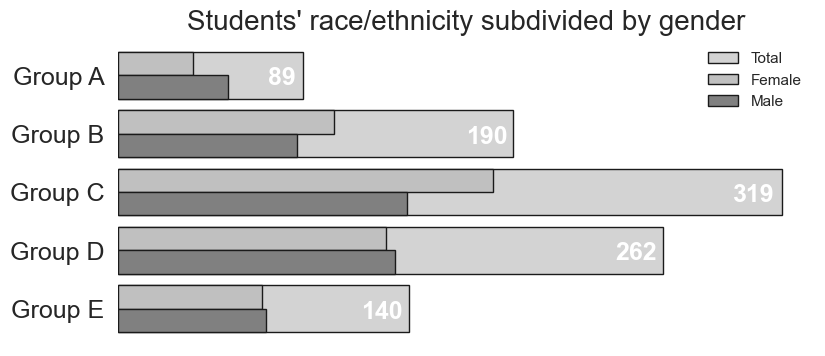

In [583]:
# Graph - setting the style and colors of plots

sns.set_theme(style='white')
# plotting
ax = sns.barplot(data=race, x=race.Total, y=race.Race, orient='h', color='lightgrey', label='Total',edgecolor='k')
plt.barh(y=race.Race, height=-0.4, width=race.Female,align='edge', color='silver', edgecolor='k', label='Female')
plt.barh(y=race.Race, height=0.4, width=race.Male,align='edge',color='grey', edgecolor='k', label='Male')
ax.figure.set_size_inches(9,4)
ax.set_title("Students' race/ethnicity subdivided by gender", fontsize=20)
sns.despine(ax=ax, top=True,right=True,bottom=True,left=True)
ax.text(79, 0.05, f'{race.Total[0]}', ha='center', va='center', size=18, weight='bold', color='white')
ax.text(177, 1.05, f'{race.Total[1]}', ha='center', va='center', size=18, weight='bold', color='white')
ax.text(305, 2.05, f'{race.Total[2]}', ha='center', va='center', size=18, weight='bold', color='white')
ax.text(249, 3.05, f'{race.Total[3]}', ha='center', va='center', size=18, weight='bold', color='white')
ax.text(127, 4.05, f'{race.Total[4]}', ha='center', va='center', size=18, weight='bold', color='white')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(labelbottom = False, bottom = False)
plt.tick_params(axis='y', which='major', labelsize=18)
ax.legend(loc='upper right',frameon=False)
plt.savefig('img/race_stu.png')
plt.show()

### Test Preparation Course

In [584]:
test = studentsperformance['test preparation course'].value_counts().to_frame()
test.reset_index(inplace=True)
test.columns = ['Test_preparation_course','Quantity']
show_text_markdown(f'- #### Which are the possible values for the test preparation course? \n > In this case, we split the students into those who {test.Test_preparation_course[1]} the preparation course and those who didn\'t ({test.Test_preparation_course[0]}). By the data, {test.Quantity[1]} completed the course and {test.Quantity[0]} didn\'t.')

- #### Which are the possible values for the test preparation course? 
 > In this case, we split the students into those who Completed the preparation course and those who didn't (No one). By the data, 358 completed the course and 642 didn't.

### Parental level of Education

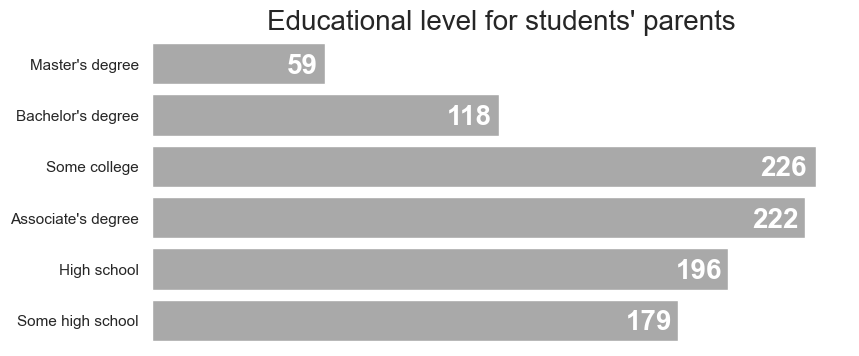

In [585]:
parental_education = studentsperformance['parental level of education'].value_counts().to_frame()
parental_education.reset_index(inplace=True)
parental_education.columns = ['Parental_level_of_education', 'Quantity']
replace_data(parental_education, parental_education.Parental_level_of_education.values, ['Some college','Associate\'s degree','High school','Some high school','Bachelor\'s degree','Master\'s degree'])

#setting the style and colors of plots
sns.set_theme(style='white')
# plotting
ax = sns.barplot(data=parental_education, x='Quantity', y='Parental_level_of_education',
                 order=['Master\'s degree','Bachelor\'s degree','Some college','Associate\'s degree','High school','Some high school'],
                 orient='h', color='darkgray')
ax.figure.set_size_inches(9,4)
sns.despine(ax=ax, top=True,right=True,bottom=True,left=True)
ax.set_title('Educational level for students\' parents', fontsize=20)
ax.text(51, 0.05, f'{parental_education.Quantity[5]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.text(108, 1.05, f'{parental_education.Quantity[4]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.text(215, 2.05, f'{parental_education.Quantity[0]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.text(212, 3.05, f'{parental_education.Quantity[1]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.text(186, 4.05, f'{parental_education.Quantity[2]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.text(169, 5.05, f'{parental_education.Quantity[3]}', ha='center', va='center', size=20, weight='bold', color='white')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(labelbottom = False, bottom = False)
plt.savefig('img/parents_edu.png')
plt.show()

In [586]:
show_text_markdown(f'- #### Which are the levels of parents education? \n > In the graph above, the different levels of education of the parents or guardians of these students were placed in ascending order, from the most basic (Some high school) to the most specialized (Master\'s degree). We can notice that the majority of parents are concentrated at the most basic levels.')

- #### Which are the levels of parents education? 
 > In the graph above, the different levels of education of the parents or guardians of these students were placed in ascending order, from the most basic (Some high school) to the most specialized (Master's degree). We can notice that the majority of parents are concentrated at the most basic levels.

### Lunch

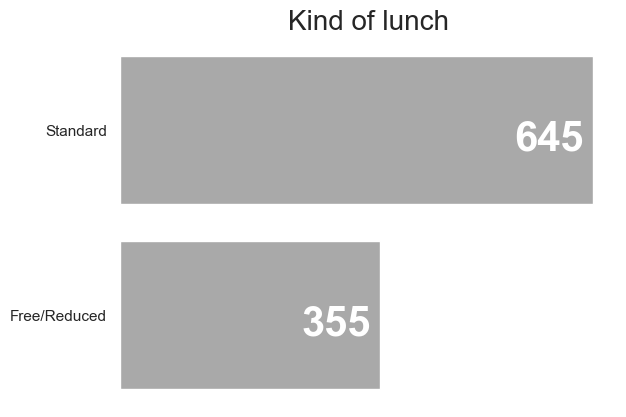

In [587]:
lunch = studentsperformance['lunch'].value_counts().to_frame()
lunch.reset_index(inplace=True)
lunch.columns = ['Kind_of_lunch', 'Quantity']
replace_data(lunch, lunch.Kind_of_lunch.values, ['Standard','Free/Reduced'])

# plot
sns.set_theme(style='white')
ax = sns.barplot(data=lunch, x='Quantity', y='Kind_of_lunch', orient='h', color='darkgray')
sns.despine(ax=ax, top=True,right=True,bottom=True,left=True)
ax.set_title('Kind of lunch', fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.text(lunch.Quantity[0]-60, 0.05, f'{lunch.Quantity[0]}', ha='center', va='center', size=30, weight='bold', color='white')
ax.text(lunch.Quantity[1]-60, 1.05, f'{lunch.Quantity[1]}', ha='center', va='center', size=30, weight='bold', color='white')
ax.tick_params(labelbottom = False, bottom = False)
plt.savefig('img/kind_lunch.png')
plt.show()

In [588]:
show_text_markdown(f'- #### Which types of lunch does the students have? \n > In relation to the type of students\' lunch, we have two categories: {lunch.Kind_of_lunch[0]} and {lunch.Kind_of_lunch[1]}, with {lunch.Quantity[0]} and {lunch.Quantity[1]} students each, respectively.\n \n> This is an important aspect for analysis, especially in more deprived regions, where nutrition tends to be limited leading to compromised learning.')

- #### Which types of lunch does the students have? 
 > In relation to the type of students' lunch, we have two categories: Standard and Free/Reduced, with 645 and 355 students each, respectively.
 
> This is an important aspect for analysis, especially in more deprived regions, where nutrition tends to be limited leading to compromised learning.

### Descriptive Statistics

In [589]:
# Stats by subject

desc = (descriptive_stats(studentsperformance))
desc

,Stat,Math_score,Reading_score,Writing_score,Science_score,Social_studies_score,Foreign_language_score,Physical_education_score,Final_score
0,mean,55.134000,81.109000,69.299000,65.084000,57.367000,75.97300,41.589000,63.651
1,std,14.588000,14.554000,12.013000,13.246000,12.179000,13.08400,13.303000,4.865
2,min,-2.657000,32.722000,29.869000,16.619000,20.156000,25.90300,-3.317000,47.840
3,25%,45.128000,71.588000,61.259000,56.147000,49.108000,67.55200,33.003000,60.540
4,50%,54.967000,81.330000,69.586000,65.554000,57.046000,75.67700,41.651000,63.560
5,75%,65.333000,91.068000,77.295000,73.370000,65.933000,84.45300,50.631000,67.122
6,max,99.492000,124.203000,114.101000,108.036000,94.648000,119.04800,78.935000,82.780
7,mode,-2.656733,32.721629,29.869171,16.618752,20.155996,25.90346,-3.316568,60.350
8,var,212.802000,211.807000,144.316000,175.446000,148.337000,171.17900,176.964000,23.666
9,amp,102.149000,91.481000,84.232000,91.417000,74.492000,93.14500,82.252000,34.940


#### Quartiles in a Boxplot

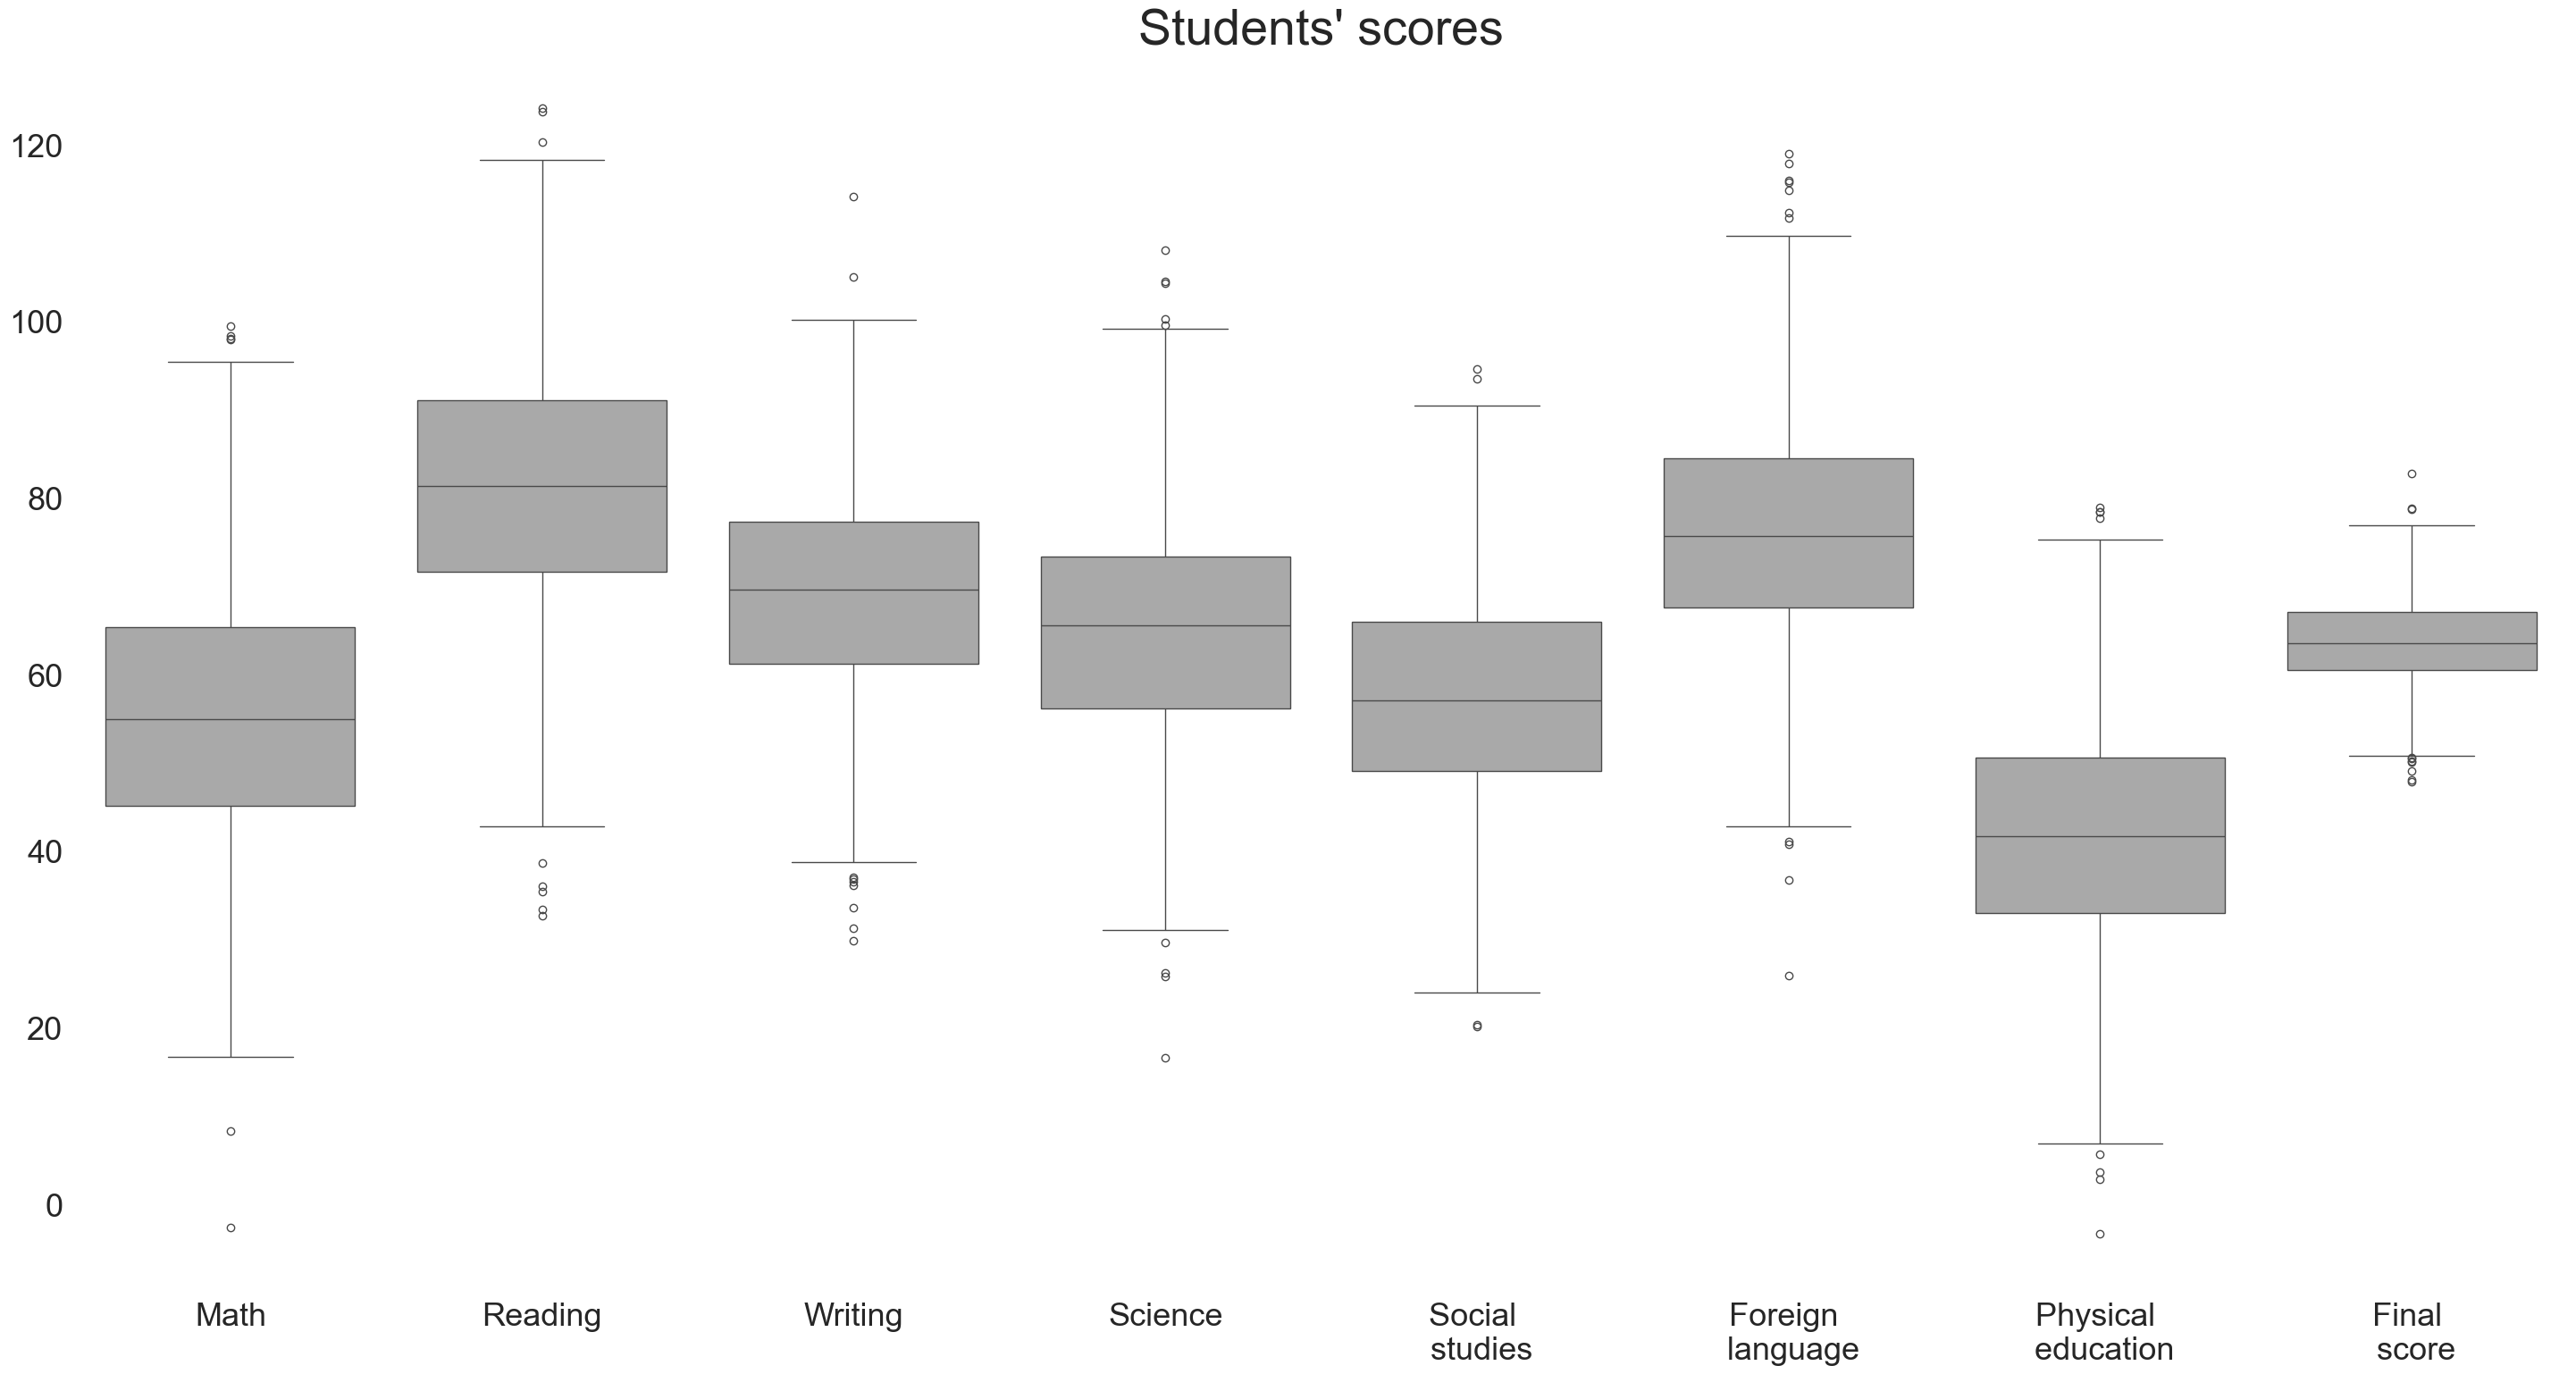

In [590]:
#setting the style and colors of plots
sns.set_theme(style='white')
# plotting
ax = sns.boxplot(data=studentsperformance[['Math_score','Reading_score', 'Writing_score', 'Science_score', 'Social_studies_score', 'Foreign_language_score', 'Physical_education_score', 'Final_score']], color='darkgray')
ax.figure.set_size_inches(36,18)
sns.despine(ax=ax, top=True,right=True,bottom=True,left=True)
ax.set_title('Students\' scores', fontsize=40)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=26)
xticks = np.arange(0,8,1)
xlabels = ['Math','Reading','Writing', 'Science', 'Social \n studies', f'Foreign \n language', f'Physical \n education', f'Final \n score']
ax.set_xticks(xticks, labels=xlabels)
plt.savefig('img/box_scores.png')
plt.show()

##### There are possible outliers in some subjects, but as the scores range from 0 to 100 and these values are within this range, there is no need to treat them statistically. In the case of a school analysis, it indicates that these students have  much lower or much higher scores than the majority of their peers, which suggests an investigation into possible causes, especially for low scores.

- ### What is the probability of selecting a student with an $ \mu \geq 60.0 $?

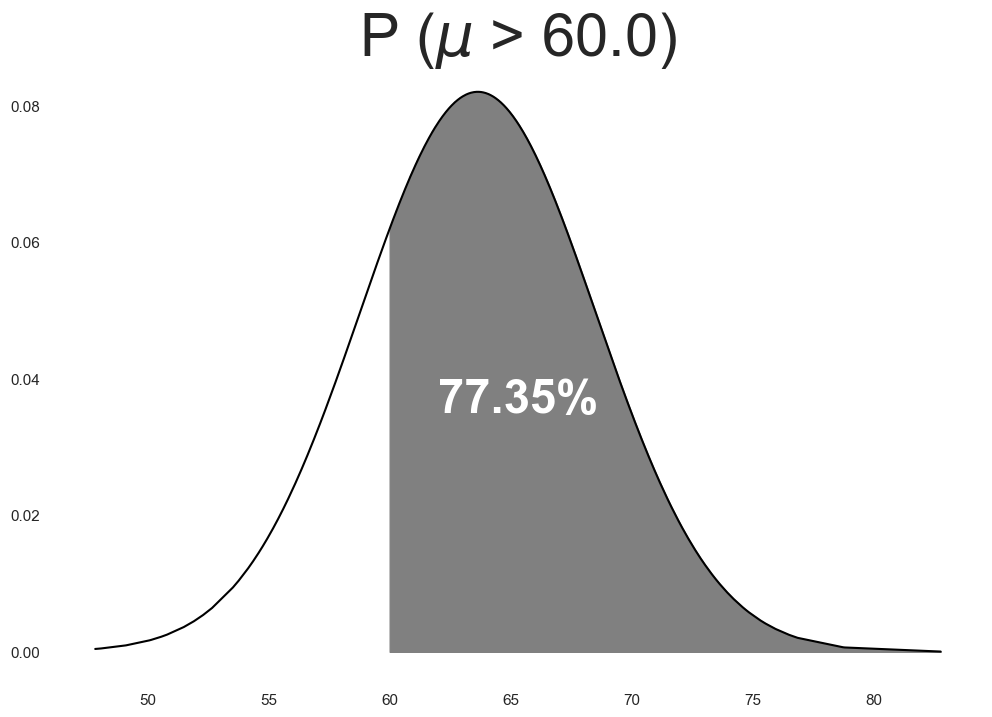

In [591]:
mu = desc[desc['Stat'].isin(['mean'])]['Final_score']
sigma = desc[desc['Stat'].isin(['std'])]['Final_score']
limit_mean = 60.0

# probability
probability_passed = 1 - scipy.stats.norm.cdf(limit_mean, loc=mu, scale=sigma)
show_text_markdown(f'> The probability of selecting a student among {len(studentsperformance)} with $\mu$ $\geq$ {limit_mean} is {probability_passed.item(0):.2%}')

pdf = scipy.stats.norm.pdf(studentsperformance['Final_score'], loc=mu, scale=sigma)
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=studentsperformance['Final_score'].values, y=pdf, color='black', ax=ax)
sns.despine(ax=ax, bottom=True, top=True, left=True,right=True)
students_fill = studentsperformance.query('Final_score >= @limit_mean')['Final_score'].sort_values(ascending=True).values  # Valores de x a partir de media_limite
ax.fill_between(students_fill,scipy.stats.norm.pdf(students_fill, loc=mu, scale=sigma), color='grey')

plt.text(62, 0.035, f'{probability_passed.item(0):.2%}', fontsize=34, color='white', weight='bold')

plt.title(f'P ($\mu$ > {limit_mean})', fontsize=43)
plt.savefig('img/p_approved.png')
plt.show()

- ### What was the subject in which students performed the worst? What was the average performance in this subject?

In [592]:
subject_string_no_score = re.sub(r'_score$', '', desc.set_index("Stat").loc["mean"].sort_values(ascending=True).idxmin())
subject_string = re.sub(r'_', ' ', subject_string_no_score) 
show_text_markdown(f'The subject with the worst performance was {subject_string.title()}, with an average score of {desc.set_index("Stat").loc["mean"].sort_values(ascending=True).min():.2f}')

The subject with the worst performance was Physical Education, with an average score of 41.59

- ### What was the subject in which students performed the best? What was the average performance in this subject?

In [593]:
subject_string_no_score = re.sub(r'_score$', '', desc.set_index("Stat").loc["mean"].sort_values(ascending=True).idxmax())
subject_string = re.sub(r'_', ' ', subject_string_no_score)
show_text_markdown(f'The subject with the best performance was {subject_string.title()}, with an average score of {desc.set_index("Stat").loc["mean"].sort_values(ascending=True).max():.2f}')

The subject with the best performance was Reading, with an average score of 81.11

- ### Is there any performance correlation between the subjects?

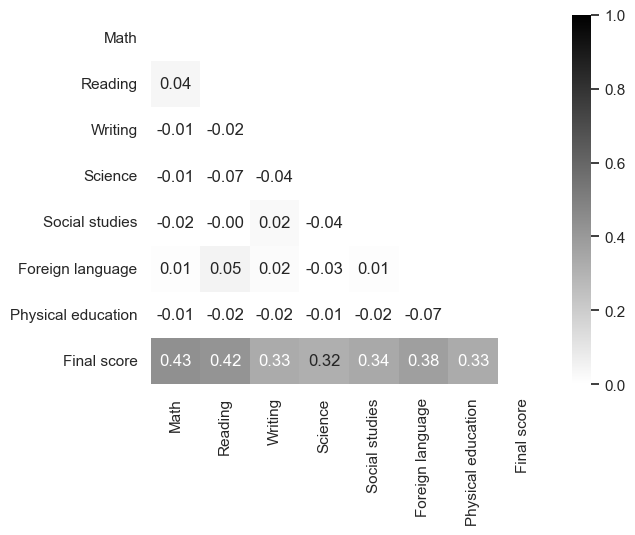

In [594]:
mask = np.triu(np.ones_like(studentsperformance.corr(numeric_only=True))) # mask to a lower triangular matrix
sns.heatmap(studentsperformance.corr(method='pearson',numeric_only=True), vmin=0.0, vmax=1.0, annot=True, fmt='.2f', cmap='gray_r', xticklabels=['Math','Reading', 'Writing', 'Science', 'Social studies', 'Foreign language', 'Physical education', 'Final score'], yticklabels=['Math','Reading', 'Writing', 'Science', 'Social studies', 'Foreign language', 'Physical education', 'Final score'], mask=mask) #pearson is the standard method matrix have to be done
plt.savefig('img/lower_trian_matrix_corr_scores.png')
plt.show()

> ##### Through this correlation matrix, we can't observe any strong correlation between the subjects. 

### Distributions

##### Without sharing axis

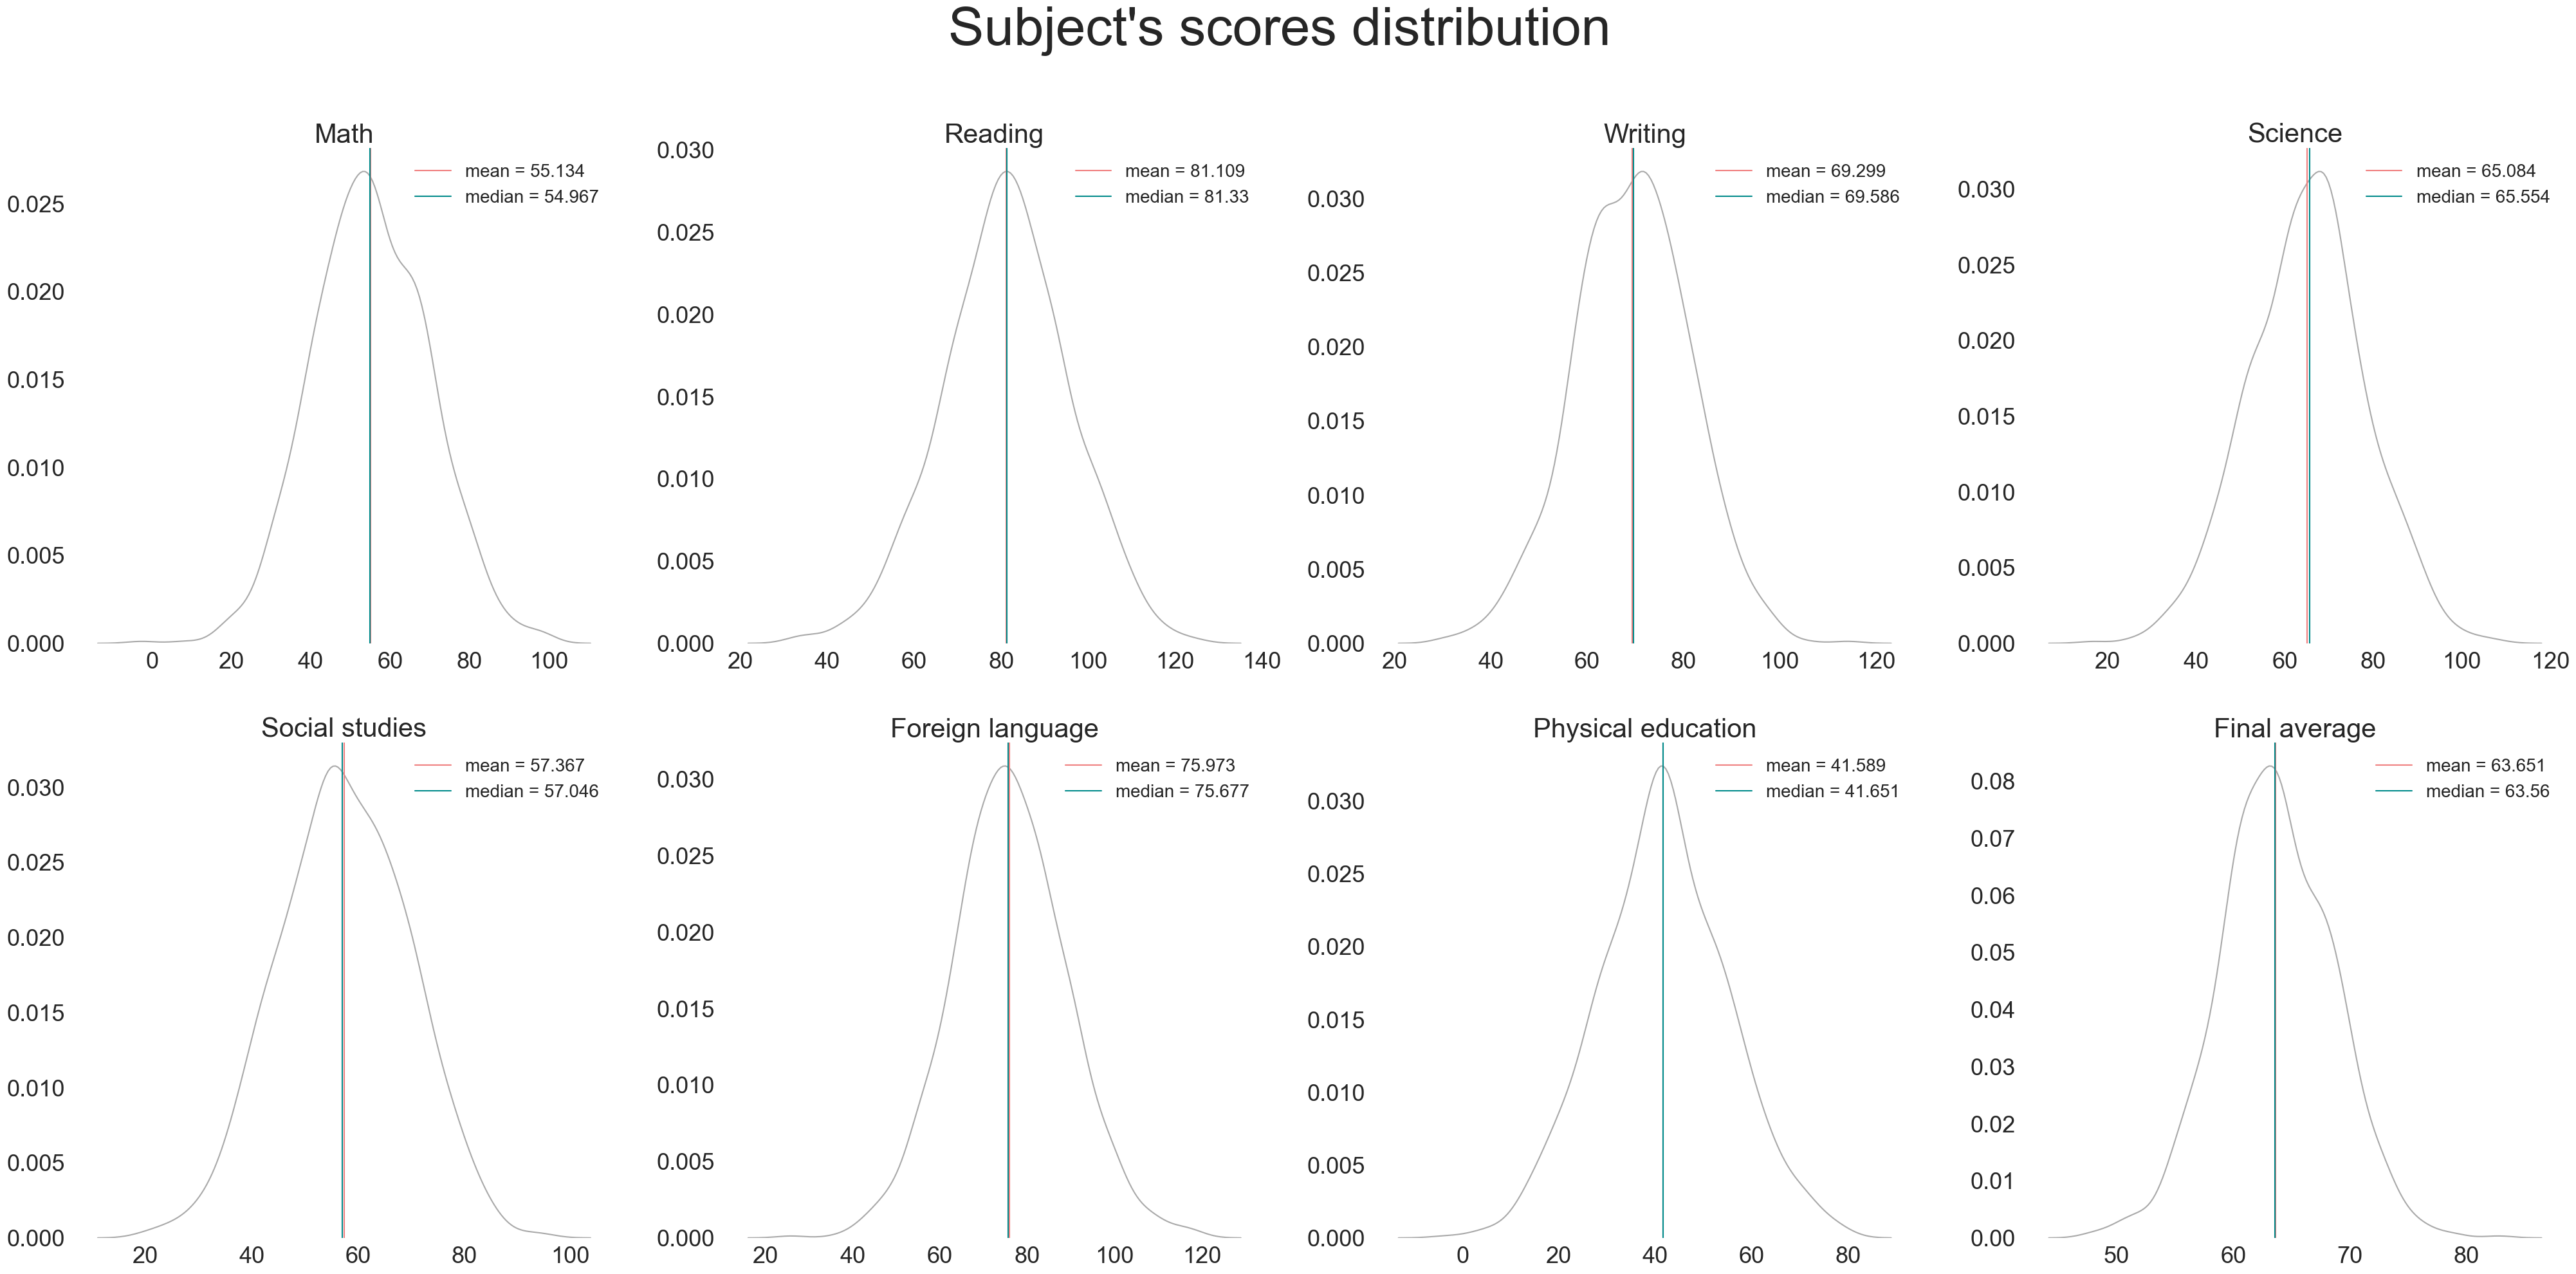

In [595]:
sns.set_theme(style='white')

fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(50,22), sharex=False, sharey=False)

fig.suptitle('Subject\'s scores distribution', fontsize=60, ha='center', va='top')

# math

sns.kdeplot(data=studentsperformance['Math_score'], color='darkgray', ax=axs[0,0])
axs[0,0].axvline(x = studentsperformance['Math_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Math_score.loc[0]}')
axs[0,0].axvline(x = studentsperformance['Math_score'].median(), color = 'darkcyan', label = f'median = {desc.Math_score.loc[4]}')
sns.despine(ax=axs[0,0], top=True,right=True,bottom=True,left=True)
axs[0,0].set_title('Math', fontsize=30)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')
axs[0,0].legend(frameon=False, fontsize=20, loc='upper right')
axs[0,0].tick_params(axis='both', which='major', labelsize=26)

#reading

sns.kdeplot(data=studentsperformance['Reading_score'], color='darkgray', ax=axs[0,1])
axs[0,1].axvline(x = studentsperformance['Reading_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Reading_score.loc[0]}')
axs[0,1].axvline(x = studentsperformance['Reading_score'].median(), color = 'darkcyan', label = f'median = {desc.Reading_score.loc[4]}')
sns.despine(ax=axs[0,1], top=True,right=True,bottom=True,left=True)
axs[0,1].set_title('Reading', fontsize=30)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
axs[0,1].legend(frameon=False, fontsize=20, loc='upper right')
axs[0,1].tick_params(axis='both', which='major', labelsize=26)


# writing

sns.kdeplot(data=studentsperformance['Writing_score'], color='darkgray', ax=axs[0,2])
axs[0,2].axvline(x = studentsperformance['Writing_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Writing_score.loc[0]}')
axs[0,2].axvline(x = studentsperformance['Writing_score'].median(), color = 'darkcyan', label = f'median = {desc.Writing_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[0,2])
axs[0,2].set_title('Writing', fontsize=30)
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')
axs[0,2].legend(frameon=False, fontsize=20, loc='upper right')
axs[0,2].tick_params(axis='both', which='major', labelsize=26)

# Science

sns.kdeplot(data=studentsperformance['Science_score'], color='darkgray', ax=axs[0,3])
axs[0,3].axvline(x = studentsperformance['Science_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Science_score.loc[0]}')
axs[0,3].axvline(x = studentsperformance['Science_score'].median(), color = 'darkcyan', label = f'median = {desc.Science_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[0,3])
axs[0,3].set_title('Science', fontsize=30)
axs[0,3].set_xlabel('')
axs[0,3].set_ylabel('')
axs[0,3].legend(frameon=False, fontsize=20, loc='upper right')
axs[0,3].tick_params(axis='both', which='major', labelsize=26)

# Social studies

sns.kdeplot(data=studentsperformance['Social_studies_score'], color='darkgray', ax=axs[1,0])
axs[1,0].axvline(x = studentsperformance['Social_studies_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Social_studies_score.loc[0]}')
axs[1,0].axvline(x = studentsperformance['Social_studies_score'].median(), color = 'darkcyan', label = f'median = {desc.Social_studies_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[1,0])
axs[1,0].set_title('Social studies', fontsize=30)
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')
axs[1,0].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,0].tick_params(axis='both', which='major', labelsize=26)

# Foreign language

sns.kdeplot(data=studentsperformance['Foreign_language_score'], color='darkgray', ax=axs[1,1])
axs[1,1].axvline(x = studentsperformance['Foreign_language_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Foreign_language_score.loc[0]}')
axs[1,1].axvline(x = studentsperformance['Foreign_language_score'].median(), color = 'darkcyan', label = f'median = {desc.Foreign_language_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[1,1])
axs[1,1].set_title('Foreign language', fontsize=30)
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,1].tick_params(axis='both', which='major', labelsize=26)

# Physical education

sns.kdeplot(data=studentsperformance['Physical_education_score'], color='darkgray', ax=axs[1,2])
axs[1,2].axvline(x = studentsperformance['Physical_education_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Physical_education_score.loc[0]}')
axs[1,2].axvline(x = studentsperformance['Physical_education_score'].median(), color = 'darkcyan', label = f'median = {desc.Physical_education_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[1,2])
axs[1,2].set_title('Physical education', fontsize=30)
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('')
axs[1,2].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,2].tick_params(axis='both', which='major', labelsize=26)

# Final Score

sns.kdeplot(data=studentsperformance['Final_score'], color='darkgray', ax=axs[1,3])
axs[1,3].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'mean = {desc.Final_score.loc[0]}')
axs[1,3].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'median = {desc.Final_score.loc[4]}')
sns.despine(top=True,right=True,bottom=True,left=True, ax=axs[1,3])
axs[1,3].set_title('Final average', fontsize=30)
axs[1,3].set_xlabel('')
axs[1,3].set_ylabel('')
axs[1,3].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,3].tick_params(axis='both', which='major', labelsize=26)

plt.savefig('img/dist_scores_no_sharex_sharey.png')
plt.show()

### Possible influences of others variables

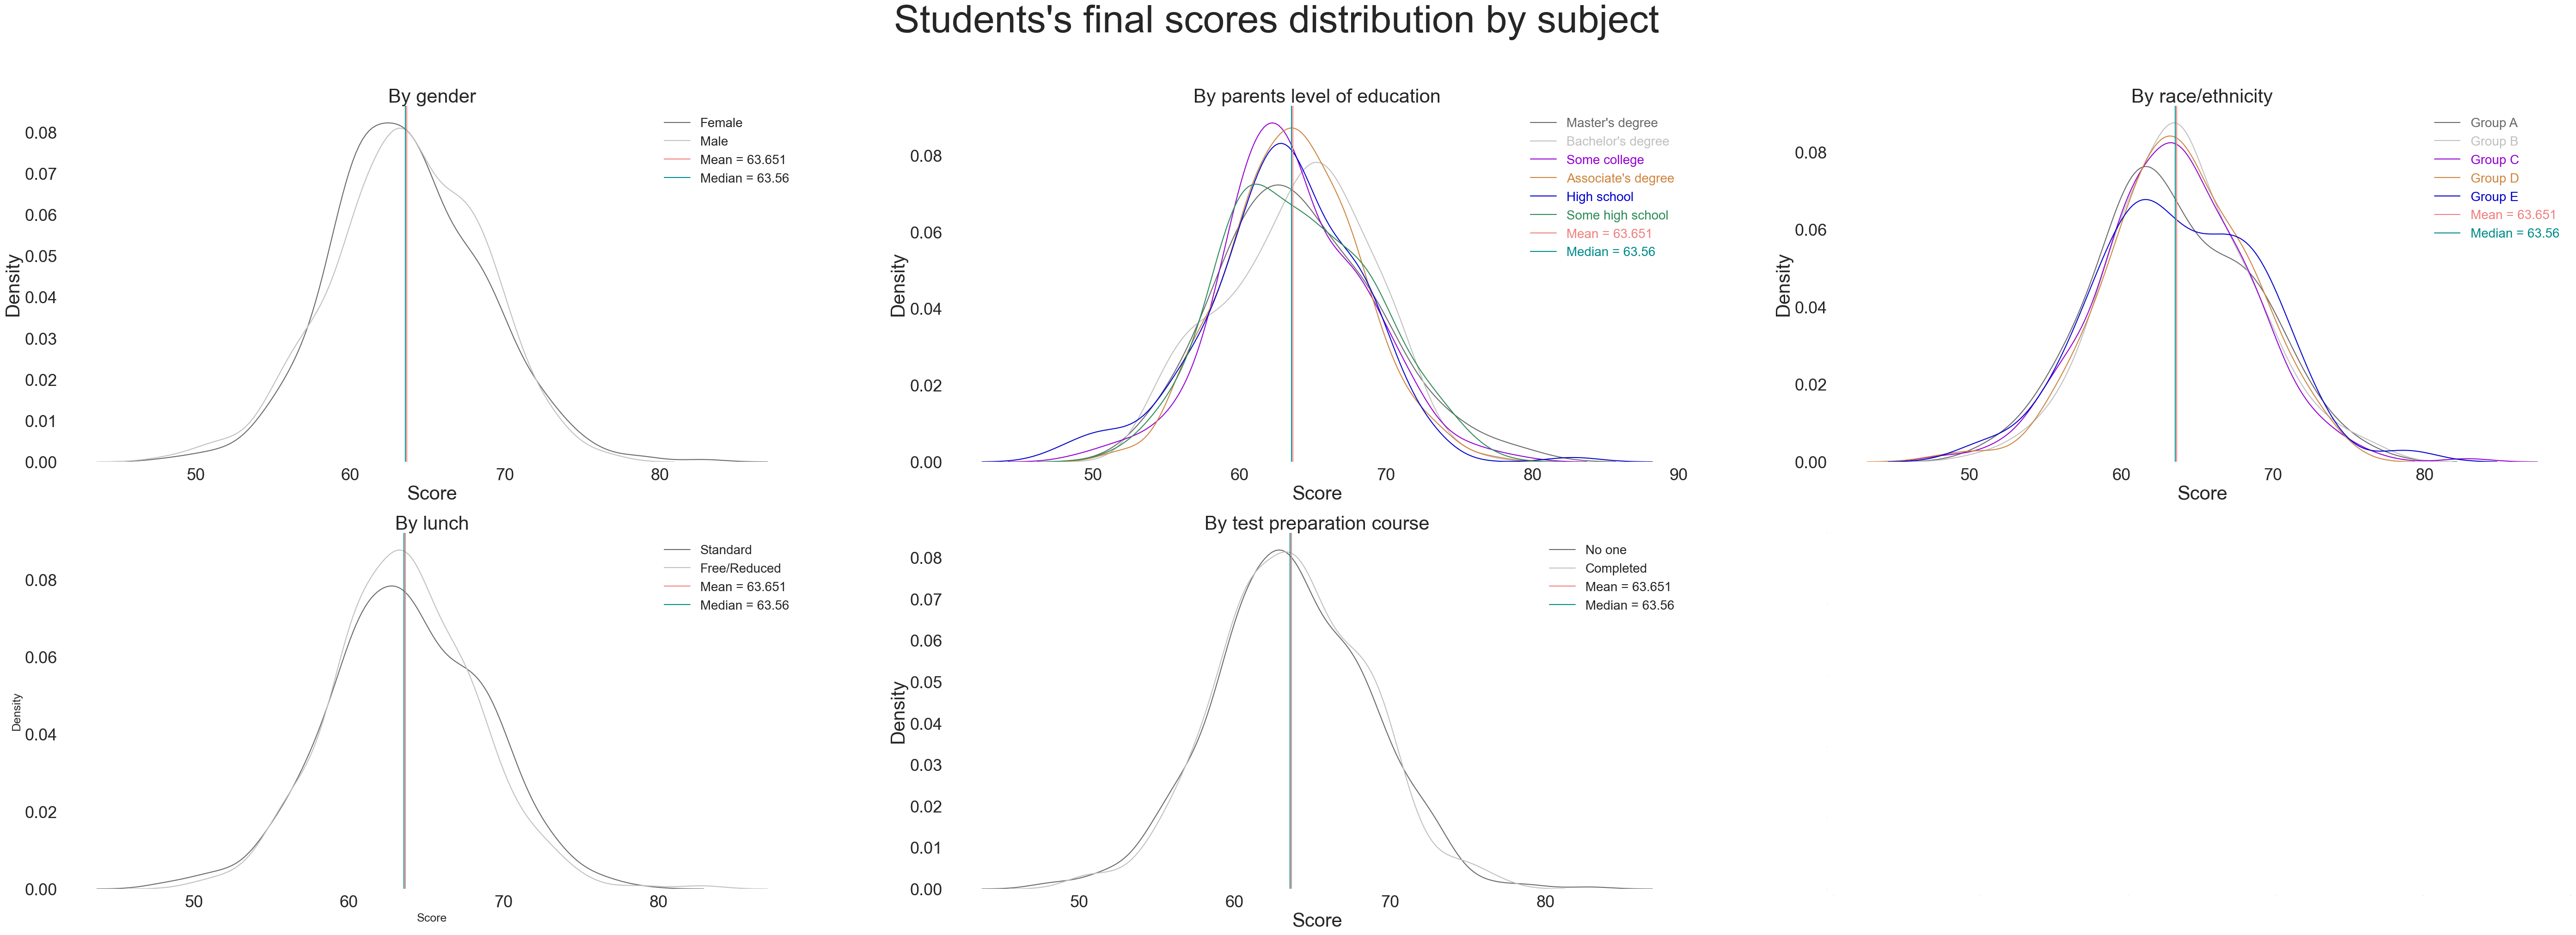

In [596]:
#setting the style and colors of plots
sns.set_theme(style='white')

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(70,22), sharex=False, sharey=False)

# final score by gender
fig.suptitle('Students\'s final scores distribution by subject', fontsize=60, ha='center', va='top')
# plotting
sns.kdeplot(data=studentsperformance.query('gender == "female"'),x='Final_score', color='dimgray',legend=True,label='Female', ax=axs[0,0])
sns.kdeplot(data=studentsperformance.query('gender == "male"'),x='Final_score', color='silver',legend=True,label='Male', ax=axs[0,0])
axs[0,0].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'Mean = {desc.Final_score.loc[0]}')
axs[0,0].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'Median = {desc.Final_score.loc[4]}')
sns.despine(ax=axs[0,0], top=True,right=True,bottom=True,left=True)
axs[0,0].set_title('By gender', fontsize=30)
axs[0,0].set_xlabel('Score', fontsize=30)
axs[0,0].set_ylabel('Density', fontsize=30)
axs[0,0].legend(frameon=False, fontsize=20, loc='upper right')
axs[0,0].tick_params(axis='both', which='major', labelsize=26)


# final score parental level of education
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "master\'s degree"'),x='Final_score', color='dimgray',legend=True,label='Master\'s degree',ax=axs[0,1])
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "bachelor\'s degree"'),x='Final_score', color='silver',legend=True,label='Bachelor\'s degree',ax=axs[0,1])
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "some college"'),x='Final_score', color='darkviolet',legend=True,label='Some college',ax=axs[0,1])
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "associate\'s degree"'),x='Final_score', color='peru',legend=True,label='Associate\'s degree',ax=axs[0,1])
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "high school"'),x='Final_score', color='mediumblue',legend=True,label='High school',ax=axs[0,1])
sns.kdeplot(data=studentsperformance.query('`parental level of education` == "some high school"'),x='Final_score', color='seagreen',legend=True,label='Some high school',ax=axs[0,1])
axs[0,1].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'Mean = {desc.Final_score.loc[0]}')
axs[0,1].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'Median = {desc.Final_score.loc[4]}')
sns.despine(ax=axs[0,1], top=True,right=True,bottom=True,left=True)
axs[0,1].set_title('By parents level of education', fontsize=30)
axs[0,1].set_xlabel('Score', fontsize=30)
axs[0,1].set_ylabel('Density', fontsize=30)
axs[0,1].legend(frameon=False,labelcolor=['dimgray','silver','darkviolet','peru','mediumblue','seagreen','lightcoral','darkcyan'],  fontsize=20, loc='upper right')
axs[0,1].tick_params(axis='both', which='major', labelsize=26)

# Group
sns.kdeplot(data=studentsperformance.query('`race/ethnicity` == "group A"'),x='Final_score', color='dimgray',legend=True,label='Group A',ax=axs[0,2])
sns.kdeplot(data=studentsperformance.query('`race/ethnicity` == "group B"'),x='Final_score', color='silver',legend=True,label='Group B',ax=axs[0,2])
sns.kdeplot(data=studentsperformance.query('`race/ethnicity` == "group C"'),x='Final_score', color='darkviolet',legend=True,label='Group C',ax=axs[0,2])
sns.kdeplot(data=studentsperformance.query('`race/ethnicity` == "group D"'),x='Final_score', color='peru',legend=True,label='Group D',ax=axs[0,2])
sns.kdeplot(data=studentsperformance.query('`race/ethnicity` == "group E"'),x='Final_score', color='mediumblue',legend=True,label='Group E',ax=axs[0,2])
axs[0,2].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'Mean = {desc.Final_score.loc[0]}')
axs[0,2].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'Median = {desc.Final_score.loc[4]}')
sns.despine(ax=axs[0,2], top=True,right=True,bottom=True,left=True)
axs[0,2].set_title('By race/ethnicity', fontsize=30)
axs[0,2].set_xlabel('Score', fontsize=30)
axs[0,2].set_ylabel('Density', fontsize=30)
axs[0,2].legend(frameon=False,labelcolor=['dimgray','silver','darkviolet','peru','mediumblue','lightcoral','darkcyan'], fontsize=20, loc='upper right')
axs[0,2].tick_params(axis='both', which='major', labelsize=26)

# Lunch
sns.kdeplot(data=studentsperformance.query('lunch == "standard"'),x='Final_score', color='dimgray',legend=True,label='Standard', ax=axs[1,0])
sns.kdeplot(data=studentsperformance.query('lunch == "free/reduced"'),x='Final_score', color='silver',legend=True,label='Free/Reduced',ax=axs[1,0])
axs[1,0].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'Mean = {desc.Final_score.loc[0]}')
axs[1,0].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'Median = {desc.Final_score.loc[4]}')
sns.despine(ax=axs[1,0], top=True,right=True,bottom=True,left=True)
axs[1,0].set_title('By lunch', fontsize=30)
axs[1,0].set_xlabel('Score', fontsize=18)
axs[1,0].set_ylabel('Density', fontsize=18)
axs[1,0].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,0].tick_params(axis='both', which='major', labelsize=26)

# Test
sns.kdeplot(data=studentsperformance.query('`test preparation course` == "No one"'),x='Final_score', color='dimgray',legend=True,label='No one', ax=axs[1,1])
sns.kdeplot(data=studentsperformance.query('`test preparation course` == "Completed"'),x='Final_score', color='silver',legend=True,label='Completed', ax=axs[1,1])
axs[1,1].axvline(x = studentsperformance['Final_score'].mean(), color = 'lightcoral', label = f'Mean = {desc.Final_score.loc[0]}')
axs[1,1].axvline(x = studentsperformance['Final_score'].median(), color = 'darkcyan', label = f'Median = {desc.Final_score.loc[4]}')
sns.despine(ax=axs[1,1], top=True,right=True,bottom=True,left=True)
axs[1,1].set_title('By test preparation course', fontsize=30)
axs[1,1].set_xlabel('Score', fontsize=30)
axs[1,1].set_ylabel('Density', fontsize=30)
axs[1,1].legend(frameon=False, fontsize=20, loc='upper right')
axs[1,1].tick_params(axis='both', which='major', labelsize=26)

sns.despine(ax=axs[1,2], top=True,right=True,bottom=True,left=True)
axs[1,2].tick_params(axis='both', labelsize=0)

plt.savefig('img/dist_final_score.png')
plt.show()

- ### Is the sample from a normal distribution?

In [597]:
sig = 0.05

for column_name, column_values in studentsperformance.filter(regex='_score').items():
    stat_test, p_val = scipy.stats.normaltest(column_values)
    print(f'Column: {column_name} \n Stat_test: {stat_test} \n p_value: {p_val} \n This is a normal distribution' if p_val > sig else f'Colunmn: {column_name} \n Stat_test: {stat_test} \n p_value: {p_val} \n This isn\'t a normal distribution')
    print('-----------------------------------------------------------------------------------------------------------------')

Column: Math_score 
 Stat_test: 0.5499874309617614 
 p_value: 0.7595768967854991 
 This is a normal distribution
-----------------------------------------------------------------------------------------------------------------
Column: Reading_score 
 Stat_test: 2.963194477840231 
 p_value: 0.22727438682517262 
 This is a normal distribution
-----------------------------------------------------------------------------------------------------------------
Column: Writing_score 
 Stat_test: 1.2183466093851623 
 p_value: 0.5438002404092399 
 This is a normal distribution
-----------------------------------------------------------------------------------------------------------------
Column: Science_score 
 Stat_test: 0.7436934616745698 
 p_value: 0.6894599073691625 
 This is a normal distribution
-----------------------------------------------------------------------------------------------------------------
Column: Social_studies_score 
 Stat_test: 2.6408116898100062 
 p_value: 0.267026908

#### As we can see, the scores are normal-like distributed.

- ### Was there a difference in performance in the subcategories of gender and/or race/ethnicity?

In [598]:
alpha = 0.01 # defining the significance
value = 0 # diff over mean values that I will be testing

- ####  Gender

#### $H_0:$ The performance for male and female was the same.
#### $H_1:$ The performance for male and female was not the same.
#### $\alpha :$ = 1%


In [599]:
h0 = 'The performance for male and female was the same.'
h1 = 'The performance for male and female was not the same.'
ztest_two_samples(studentsperformance[studentsperformance['gender'] == 'male']['Final_score'],studentsperformance[studentsperformance['gender'] == 'female']['Final_score'],alpha,value,'two-sided', h0, h1)

'Null hypothesis is accepted: The performance for male and female was the same.'

- ####  Race

#### $H_0:$ The performance for groups A, B, C, D, and E was the same.
#### $H_1:$ The performance for groups A, B, C, D, and E was not the same.
#### $\alpha :$ = 1%

In [600]:
# ANOVA

h0 = 'The performance for groups A, B, C, D, and E was the same.'
h1 = 'The performance for groups A, B, C, D, and E was not the same.'

anova_race(studentsperformance, h0, h1, alpha)


'Null hypothesis is accepted: The performance for groups A, B, C, D, and E was the same.'

- ###  Did the students who took the test preparation course perform better?

- ####  Test preparation course

#### $H_0:$ The performance was the same.
#### $H_1:$ The performance was not the same.
#### $\alpha :$ = 1%

In [601]:
h0 = 'The performance was the same.'
h1 = 'The performance was not the same.'
ztest_two_samples(studentsperformance[studentsperformance['test preparation course'] == 'No one']['Final_score'], studentsperformance[studentsperformance['test preparation course'] == 'Completed']['Final_score'], alpha, value, 'two-sided', h0,h1)

'Null hypothesis is accepted: The performance was the same.'

- ###  Did students whose parents have higher levels of education perform better?

- ####  Parents level of education

#### $H_0:$ The performance was the same.
#### $H_1:$ The performance was not the same.
#### $\alpha :$ = 1%

In [602]:
# ztest_two samples -> master's and bachelor's compared with other ones
h0 = 'The performance was the same.'
h1 = 'The performance was not the same.'

ztest_two_samples(studentsperformance[studentsperformance['parental level of education'].isin(['master\'s degree','bachelor\'s degree'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['some college','associate\'s degree', 'high school', 'some high school'])]['Final_score'], alpha, value, 'two-sided', h0, h1)

'Null hypothesis is accepted: The performance was the same.'

In [603]:
# ANOVA -> comparing all

f_stat, p_value = scipy.stats.f_oneway(studentsperformance[studentsperformance['parental level of education'].isin(['master\'s degree'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['bachelor\'s degree'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['some college'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['associate\'s degree'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['high school'])]['Final_score'], studentsperformance[studentsperformance['parental level of education'].isin(['some high school'])]['Final_score'])

show_text_markdown(f'Null hypothesis is accepted: {h0}' if p_value > alpha else f'Null hypothesis is not accepted: {h1}')

Null hypothesis is accepted: The performance was the same.


- ### Did the type of lunch influence students' performance?


- ####  Lunch

#### $H_0:$ The performance was the same.
#### $H_1:$ The performance was not the same.
#### $\alpha :$ = 1%

In [604]:
# lunch
h0 = 'The performance was the same.'
h1 = 'The performance was not the same.'
ztest_two_samples(studentsperformance[studentsperformance['lunch'] == 'free/reduced']['Final_score'], studentsperformance[studentsperformance['lunch'] == 'standard']['Final_score'], alpha, value, 'two-sided', h0, h1)

'Null hypothesis is accepted: The performance was the same.'